# Introduction
This notebook parses the ["Food and Beverages" dataset made available by STATS SA](http://www.statssa.gov.za/?page_id=1854&PPN=P6420&SCH=7525).

The original dataset is in a rather ugly format (as are most datasets when exported from some portal). 
This notebook attempts to improve the original dataset to the point of being usable, while also adding additional useful features.

Since transparency is a very valuable property of datasets, this notebook serves as a record of how the data was transformed.  
I've deliberately taken steps to ensure that the methodology behind the transformation is made as clear as possible.

## Imports

In [119]:
import numpy as np
import pandas as pd

from plotnine import *

## Enter data

In [120]:
df = pd.read_csv('Food and beverages from 2005_export.csv', skiprows=1)
df.head()

,H00,H01,H02,H03,H04,H15,H16,H25,H18,_LABEL_,...,MO012019,MO022019,MO032019,MO042019,MO052019,MO062019,MO072019,MO082019,MO092019,MO102019
0,1,P6420,Food and beverages,A64201,Income from food sales : Restaurants and coffe...,Current prices,Actual figures,MONTHLY,NaN,NaN,...,2605.8,2592.0,3148.9,2619.0,2590.1,2594.9,2618.2,2642.7,2744.9,2686.3
1,2,P6420,Food and beverages,B64201,Income from bar sales : Restaurants and coffee...,Current prices,Actual figures,MONTHLY,NaN,NaN,...,291.1,289.8,323.1,272.1,260.0,270.3,259.4,278.2,279.9,292.0
2,3,P6420,Food and beverages,C64201,Other income : Restaurants and coffee shops,Current prices,Actual figures,MONTHLY,NaN,NaN,...,32.4,41.8,53.4,52.4,37.1,36.2,33.3,32.6,27.3,31.4
3,4,P6420,Food and beverages,D64201,Total income : Restaurants and coffee shops,Current prices,Actual figures,MONTHLY,NaN,NaN,...,2929.3,2923.6,3525.4,2943.5,2887.2,2901.4,2910.9,2953.5,3052.1,3009.7
4,5,P6420,Food and beverages,A64203,Income from food sales : Take-away and fast fo...,Current prices,Actual figures,MONTHLY,NaN,NaN,...,1689.3,1696.0,1951.6,1789.9,1913.1,1883.4,1894.7,2009.4,1909.7,1903.4


## Preprocessing

In [121]:
month_cols = [col for col in df.columns if 'MO' in col]
other_cols = ['H01', 'H03', 'H04', 'H15', 'H16', 'H25', 'H18']

df = df[other_cols + month_cols]

In [122]:
# Let's fix some of the column names
rename_meta_dict = {
    'H01': 'study_number',
    'H03': 'metric_code',
    'H04': 'long_description',
    'H15': 'price_type',
    'H16': 'adjusted',
    'H25': 'frequency',
    'H18': 'adjustment_index'
}

# First the columns containing metadata
df = df.rename(rename_meta_dict, axis=1)

# Then columsn containing the data
rename_date_cols_dict = {col: col[2:4] + '-' + col[4:] for col in df.columns if 'MO' in col}  # Not the cleanest, perhaps
df = df.rename(rename_date_cols_dict, axis=1)

df.head()

,study_number,metric_code,long_description,price_type,adjusted,frequency,adjustment_index,08-2005,09-2005,10-2005,...,01-2019,02-2019,03-2019,04-2019,05-2019,06-2019,07-2019,08-2019,09-2019,10-2019
0,P6420,A64201,Income from food sales : Restaurants and coffe...,Current prices,Actual figures,MONTHLY,NaN,933.1,957.7,972.0,...,2605.8,2592.0,3148.9,2619.0,2590.1,2594.9,2618.2,2642.7,2744.9,2686.3
1,P6420,B64201,Income from bar sales : Restaurants and coffee...,Current prices,Actual figures,MONTHLY,NaN,133.9,136.6,127.1,...,291.1,289.8,323.1,272.1,260.0,270.3,259.4,278.2,279.9,292.0
2,P6420,C64201,Other income : Restaurants and coffee shops,Current prices,Actual figures,MONTHLY,NaN,14.6,11.0,9.9,...,32.4,41.8,53.4,52.4,37.1,36.2,33.3,32.6,27.3,31.4
3,P6420,D64201,Total income : Restaurants and coffee shops,Current prices,Actual figures,MONTHLY,NaN,1081.6,1105.3,1109.0,...,2929.3,2923.6,3525.4,2943.5,2887.2,2901.4,2910.9,2953.5,3052.1,3009.7
4,P6420,A64203,Income from food sales : Take-away and fast fo...,Current prices,Actual figures,MONTHLY,NaN,443.2,455.6,460.2,...,1689.3,1696.0,1951.6,1789.9,1913.1,1883.4,1894.7,2009.4,1909.7,1903.4


## Additional features

In [123]:
def get_location_type(x):
    if 'Restaurants' in x or 'coffee shops' in x:
        return 'restaurants and coffee shops'
    elif 'Take-away' in x or 'fast food' in x:
        return 'Take-away and fast food'
    elif 'Catering' in x:
        return 'Catering'
    elif 'Total industry' in x:
        return 'Total industry'

def get_sale_type(x):
    if 'food sales' in x:
        return 'food'
    elif 'bar sales' in x:
        return 'bar'
    elif 'Other income' in x:
        return 'other'
    elif 'Total income' in x:
        return 'total'

df['location_type'] = df['long_description'].apply(get_location_type)
df['sale_type'] = df['long_description'].apply(get_sale_type)
df.head()

,study_number,metric_code,long_description,price_type,adjusted,frequency,adjustment_index,08-2005,09-2005,10-2005,...,03-2019,04-2019,05-2019,06-2019,07-2019,08-2019,09-2019,10-2019,location_type,sale_type
0,P6420,A64201,Income from food sales : Restaurants and coffe...,Current prices,Actual figures,MONTHLY,NaN,933.1,957.7,972.0,...,3148.9,2619.0,2590.1,2594.9,2618.2,2642.7,2744.9,2686.3,restaurants and coffee shops,food
1,P6420,B64201,Income from bar sales : Restaurants and coffee...,Current prices,Actual figures,MONTHLY,NaN,133.9,136.6,127.1,...,323.1,272.1,260.0,270.3,259.4,278.2,279.9,292.0,restaurants and coffee shops,bar
2,P6420,C64201,Other income : Restaurants and coffee shops,Current prices,Actual figures,MONTHLY,NaN,14.6,11.0,9.9,...,53.4,52.4,37.1,36.2,33.3,32.6,27.3,31.4,restaurants and coffee shops,other
3,P6420,D64201,Total income : Restaurants and coffee shops,Current prices,Actual figures,MONTHLY,NaN,1081.6,1105.3,1109.0,...,3525.4,2943.5,2887.2,2901.4,2910.9,2953.5,3052.1,3009.7,restaurants and coffee shops,total
4,P6420,A64203,Income from food sales : Take-away and fast fo...,Current prices,Actual figures,MONTHLY,NaN,443.2,455.6,460.2,...,1951.6,1789.9,1913.1,1883.4,1894.7,2009.4,1909.7,1903.4,Take-away and fast food,food


## Transform to "tidy"-esque format
I only want to pivot out the month columns and the amounts.  
I can hardcode this, but it would be a little easier / more fun if I create a `set` of all the columns and then _subtract_ out the date columns:

In [124]:
date_cols = [col for col in df.columns if '-' in col]
col_set = set(df.columns)
other_cols = col_set - set(date_cols) - set(['long_description'])
other_cols  # Our set of "id" columns

{'adjusted',
 'adjustment_index',
 'frequency',
 'location_type',
 'metric_code',
 'price_type',
 'sale_type',
 'study_number'}

In [125]:
# Pivot!
df = df.melt(id_vars=list(other_cols),
             value_vars=date_cols,
             var_name='date',
             value_name='rand_millions')

df.head()

,metric_code,frequency,location_type,adjustment_index,adjusted,sale_type,study_number,price_type,date,rand_millions
0,A64201,MONTHLY,restaurants and coffee shops,NaN,Actual figures,food,P6420,Current prices,08-2005,933.1
1,B64201,MONTHLY,restaurants and coffee shops,NaN,Actual figures,bar,P6420,Current prices,08-2005,133.9
2,C64201,MONTHLY,restaurants and coffee shops,NaN,Actual figures,other,P6420,Current prices,08-2005,14.6
3,D64201,MONTHLY,restaurants and coffee shops,NaN,Actual figures,total,P6420,Current prices,08-2005,1081.6
4,A64203,MONTHLY,Take-away and fast food,NaN,Actual figures,food,P6420,Current prices,08-2005,443.2


## Postprocessing

In [128]:
def convert_to_float_coerce(x):
    """Coerce values into floats, returning a NaN if the conversion isn't possible."""
    try:
        return float(x)
    except ValueError:
        return np.nan

In [129]:
df['rand_millions'] = df['rand_millions'].apply(convert_to_float_coerce)

In [130]:
# Add a proper datetime variable
df['datetime'] = pd.to_datetime(df['date'])  # Converts to the first of the mount -- perhaps not idea?

## Export to .csv

In [105]:
# export
df.to_csv('Food-and-beverages-from-2015-toOct2019-export.csv')

# Example: Plot bar sales over time

In [131]:
from plotnine import *

/Users/michael/miniconda2/envs/eda3/lib/python3.7/site-packages/plotnine/stats/smoothers.py:168: PlotnineWarning: Confidence intervals are not yet implementedfor lowess smoothings.
  "for lowess smoothings.", PlotnineWarning)
/Users/michael/miniconda2/envs/eda3/lib/python3.7/site-packages/plotnine/layer.py:452: PlotnineWarning: geom_point : Removed 87 rows containing missing values.
  self.data = self.geom.handle_na(self.data)


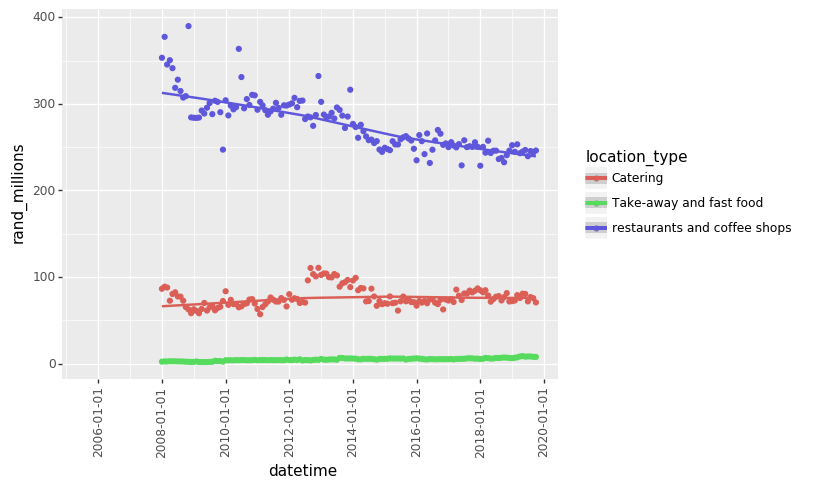

<ggplot: (-9223372036550620307)>

In [132]:
p = ggplot(aes(x='datetime',
               y='rand_millions',
              color='location_type'),
           df.query('adjusted == "Seasonally adjusted"')
           .query('price_type == "Constant prices"')
           .query('sale_type == "bar"')
           .query('location_type != "Total industry"')
          )
p + geom_point() + geom_smooth() + theme(axis_text_x=element_text(angle=90))